In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import cv2
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers
import datetime
# from google.colab import drive
import os
import zipfile
import random
import seaborn as sns
from PIL import Image
# import cv2 as cv
from collections import Counter
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from tensorflow import keras

In [2]:
path = "dataset_sm/"
classes = os.listdir(path)
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))
print(f'Total number of categories: {len(classes)}')
print(f'Total number of images in dataset: {sum(list(counts.values()))}')

Total number of categories: 72
Total number of images in dataset: 4605


In [4]:
classes[:30]

['Aerodactyl',
 'Alakazam',
 'Articuno',
 'Bellsprout',
 'Blastoise',
 'Bulbasaur',
 'Chansey',
 'Charizard',
 'Charmander',
 'Diglett',
 'Ditto',
 'Dodrio',
 'Dragonair',
 'Dratini',
 'Drowzee',
 'Eevee',
 'Gengar',
 'Geodude',
 'Gloom',
 'Golbat',
 'Golduck',
 'Golem',
 'Graveler',
 'Grimer',
 'Horsea',
 'Hypno',
 'Ivysaur',
 'Jigglypuff',
 'Jolteon',
 'Jynx']

In [5]:
batch_size = 64
img_height = 224
img_width = 224

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4596 files belonging to 72 classes.
Using 3677 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4596 files belonging to 72 classes.
Using 919 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Aerodactyl', 'Alakazam', 'Articuno', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Chansey', 'Charizard', 'Charmander', 'Diglett', 'Ditto', 'Dodrio', 'Dragonair', 'Dratini', 'Drowzee', 'Eevee', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kadabra', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machoke', 'Magikarp', 'Magnemite', 'Marowak', 'Meowth', 'Mewtwo', 'Nidorina', 'Ninetales', 'Omanyte', 'Omastar', 'Onix', 'Persian', 'Pidgeot', 'Pikachu', 'Poliwag', 'Poliwhirl', 'Ponyta', 'Psyduck', 'Raichu', 'Sandshrew', 'Seel', 'Shellder', 'Slowpoke', 'Snorlax', 'Squirtle', 'Starmie', 'Staryu', 'Tauros', 'Vaporeon', 'Venomoth', 'Venonat', 'Voltorb', 'Vulpix', 'Wartortle', 'Weedle', 'Weepinbell', 'Weezing']


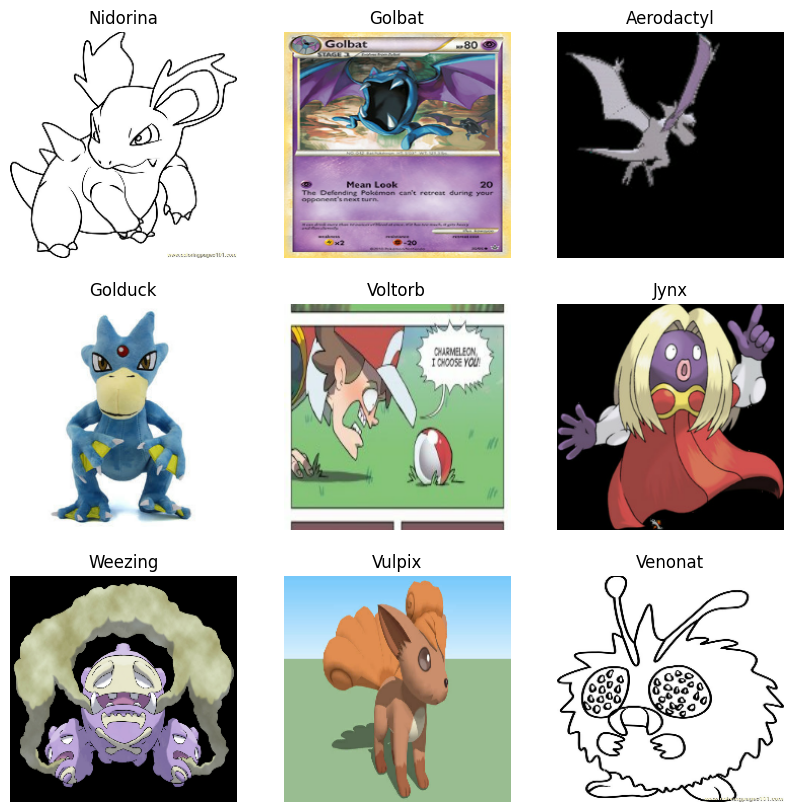

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 3)
(64,)


In [12]:
for image_batch, labels_batch in val_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 3)
(64,)


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
normalization_layer = layers.Rescaling(1./255)

In [18]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

f:\Programy\Conda\envs\Python_intro\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 72)             │         9,288 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,455,528 (24.63 MB)

 Trainable params: 6,455,528 (24.63 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
epochs=70
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/70
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.0291 - loss: 4.3819 - val_accuracy: 0.0729 - val_loss: 3.9257
Epoch 2/70
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.1126 - loss: 3.7393 - val_accuracy: 0.1643 - val_loss: 3.5042
Epoch 3/70
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.2693 - loss: 2.9677 - val_accuracy: 0.2242 - val_loss: 3.1615
Epoch 4/70
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.4989 - loss: 1.9625 - val_accuracy: 0.2797 - val_loss: 3.1685
Epoch 5/70
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.6879 - loss: 1.2143 - val_accuracy: 0.2916 - val_loss: 3.6878
Epoch 6/70
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.8481 - loss: 0.5925 - val_accuracy: 0.2818 - val_loss: 3.7709
Epoch 7/70
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9218 - loss: 0.3782 - val_accuracy: 0.3014 - val_loss: 4.1617
Epoch 8/70
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9573 - loss: 0.2455 - val_accuracy: 0.

2/2 - 0s - 25ms/step - accuracy: 0.2812 - loss: 6.1714


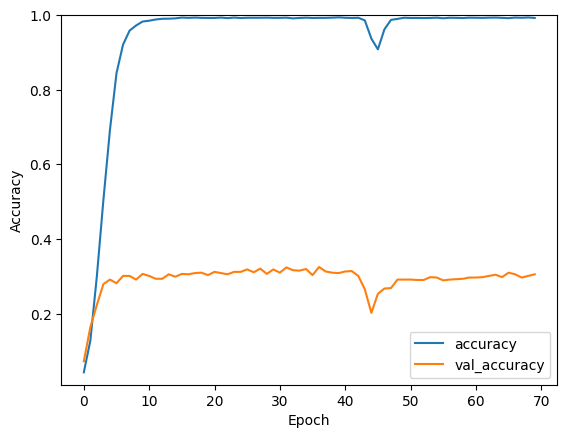

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.01, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(image_batch, labels_batch, verbose=2)

In [23]:
pokemon_url = "https://krainajednorozca.pl/wp-content/uploads/2023/08/325C19B6-CB1C-48FC-8B19-FA012820C766.jpeg"
pokemon_path = tf.keras.utils.get_file('Jigglypuff', origin=pokemon_url)

img = tf.keras.utils.load_img(
    pokemon_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This image most likely belongs to Chansey with a 98.87 percent confidence.


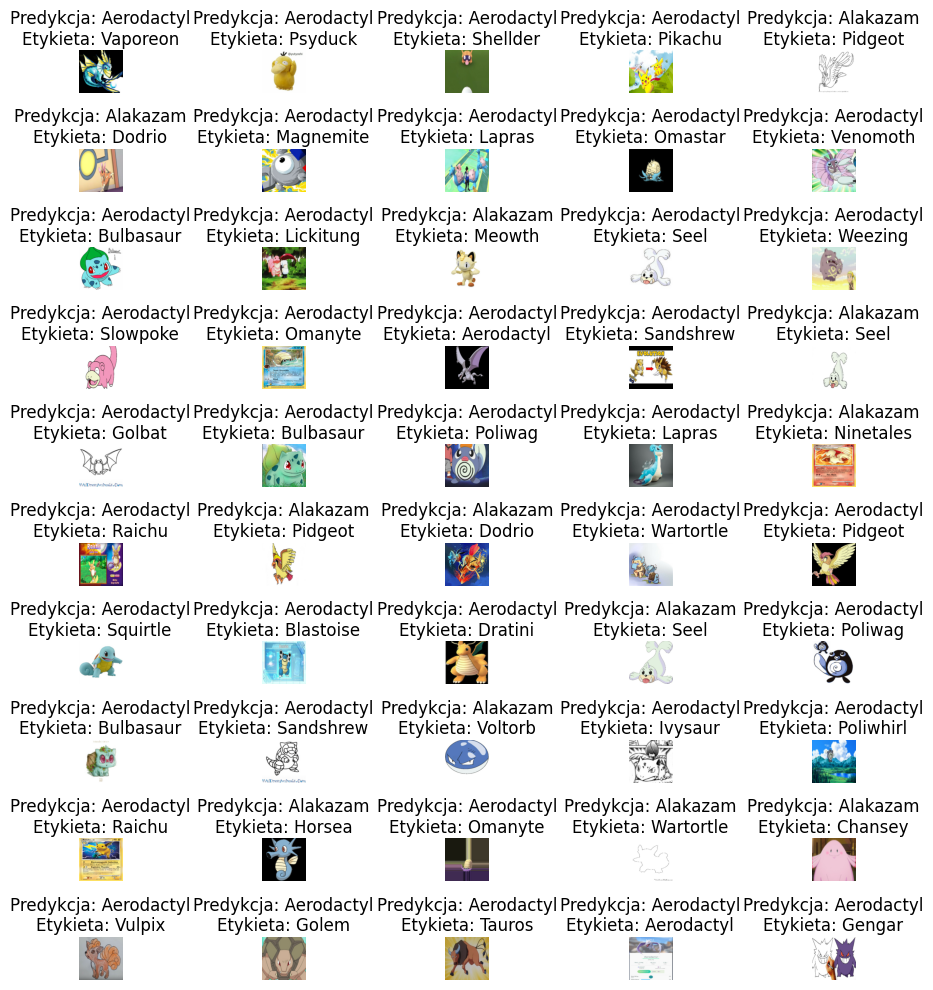

In [48]:
image_batch, label_batch = train_ds.as_numpy_iterator().next()
image_batch = image_batch[:50]
label_batch = label_batch[:50]

predictions = model.predict_on_batch(image_batch).flatten()
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

plt.figure(figsize=(10, 10))
for i in range(50):
    ax = plt.subplot(10, 5, i+1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(f"Predykcja: {class_names[predictions[i]]}\nEtykieta: {class_names[label_batch[i]]}", wrap=True)
    plt.axis("off")
plt.tight_layout()  # Dopasuj odstępy między obrazami
plt.show()

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [26]:
model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 72)             │         9,288 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,366,586 (73.88 MB)

 Trainable params: 6,455,528 (24.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,911,058 (49.25 MB)

In [29]:
epochs = 60
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.0267 - loss: 4.3844 - val_accuracy: 0.0631 - val_loss: 4.1455
Epoch 2/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.0480 - loss: 4.0543 - val_accuracy: 0.0773 - val_loss: 3.9010
Epoch 3/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.0989 - loss: 3.7443 - val_accuracy: 0.1415 - val_loss: 3.5598
Epoch 4/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.1819 - loss: 3.3265 - val_accuracy: 0.1763 - val_loss: 3.2846
Epoch 5/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.2198 - loss: 3.0657 - val_accuracy: 0.2296 - val_loss: 3.1137
Epoch 6/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.2851 - loss: 2.7552 - val_accuracy: 0.2633 - val_loss: 2.9426
Epoch 7/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.3350 - loss: 2.5597 - val_accuracy: 0.2764 - val_loss: 2.8556
Epoch 8/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.3873 - loss: 2.3635 - val_accuracy: 0.

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 20
'y' sizes: 64


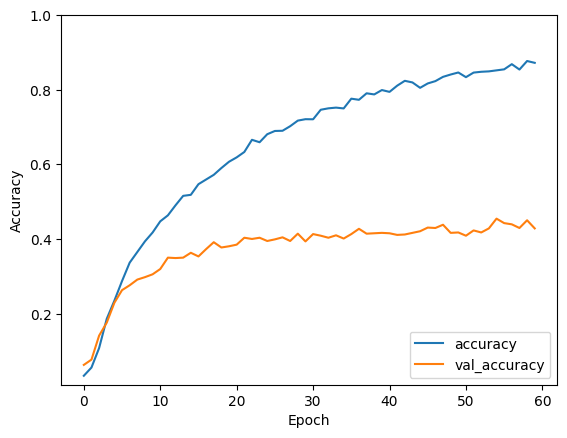

In [30]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.01, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = model2.evaluate(image_batch, labels_batch, verbose=2)

In [31]:
test_acc2

NameError: name 'test_acc2' is not defined

In [32]:
pokemon_url = "https://krainajednorozca.pl/wp-content/uploads/2023/08/325C19B6-CB1C-48FC-8B19-FA012820C766.jpeg"
pokemon_path = tf.keras.utils.get_file('Jigglypuff', origin=pokemon_url)

img = tf.keras.utils.load_img(
    pokemon_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This image most likely belongs to Chansey with a 87.73 percent confidence.


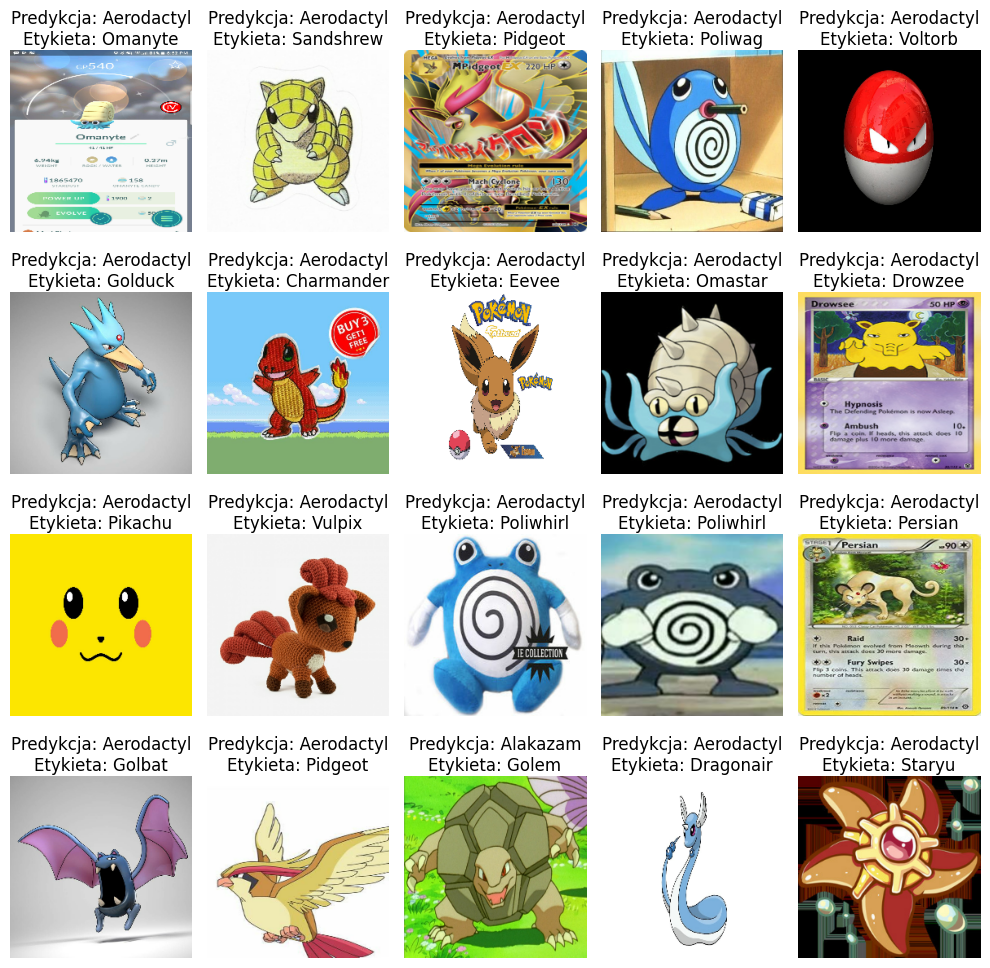

In [33]:
image_batch, label_batch = train_ds.as_numpy_iterator().next()
image_batch = image_batch[:20]
label_batch = label_batch[:20]

predictions2 = model2.predict_on_batch(image_batch).flatten()
predictions2 = tf.nn.sigmoid(predictions2)
predictions2 = tf.where(predictions2 < 0.5, 0, 1)

plt.figure(figsize=(10, 10))
for i in range(20):
    ax = plt.subplot(4, 5, i+1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(f"Predykcja: {class_names[predictions2[i]]}\nEtykieta: {class_names[label_batch[i]]}", wrap=True)
    plt.axis("off")
plt.tight_layout()  # Dopasuj odstępy między obrazami
plt.show()

In [35]:
input_shape = (224,224,3)
inputLayer = tf.keras.Input(shape=(input_shape))

In [36]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
# base_model = tf.keras.applications.MobileNetV3Large(
#base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # wczytaj z nauczonymi wagami
    input_shape=input_shape,
    include_top=False) 

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [37]:
base_model.trainable = False

In [38]:
x = base_model(inputLayer, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(1)(x)

In [39]:
model3 = tf.keras.Model(inputLayer, output)
model3.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [40]:
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [41]:
history3 = model3.fit(
    train_ds,
    epochs=60,
    validation_data=val_ds
)

Epoch 1/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - accuracy: 0.0137 - loss: -2422.3657 - val_accuracy: 0.0087 - val_loss: -10067.6816
Epoch 2/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.0118 - loss: -11995.2002 - val_accuracy: 0.0087 - val_loss: -20103.3359
Epoch 3/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.0119 - loss: -21987.9844 - val_accuracy: 0.0087 - val_loss: -30201.5645
Epoch 4/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.0121 - loss: -31276.0234 - val_accuracy: 0.0087 - val_loss: -40230.8320
Epoch 5/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.0136 - loss: -40390.8164 - val_accuracy: 0.0087 - val_loss: -50308.0547
Epoch 6/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 234ms/step - accuracy: 0.0088 - loss: -50917.2148 - val_accuracy: 0.0087 - val_loss: -60375.8906
Epoch 7/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.0101 - loss: -61169.6836 - val_accuracy: 0.0087 - val_loss: -70458.8203
Epoch 8/60
58/58 ━━━━━━━━━━━

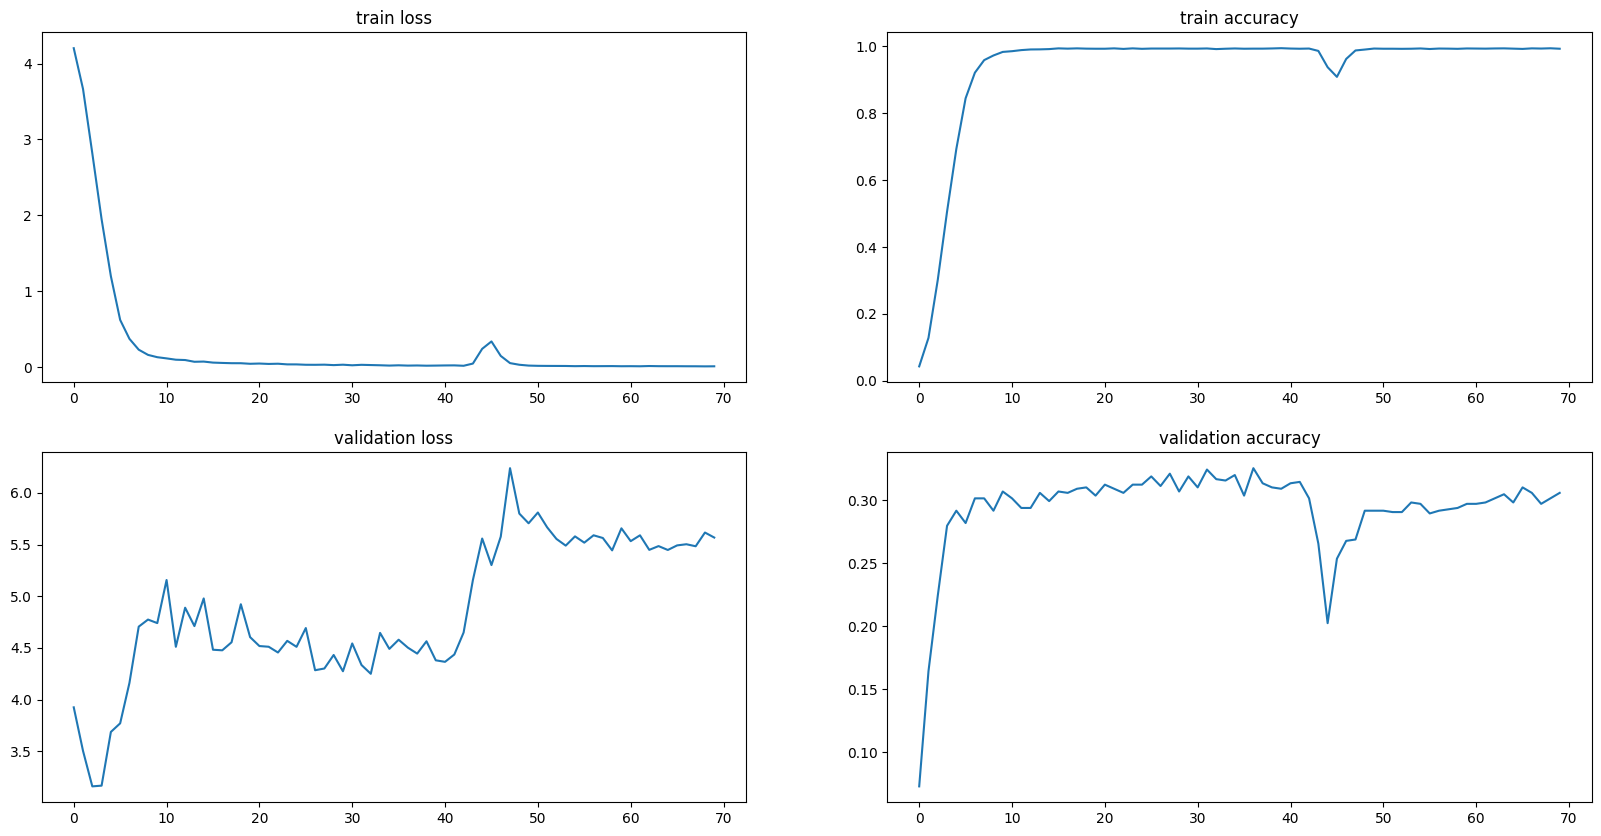

In [42]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
# wyświetlamy wykresy
ax[0][0].plot(history.history["loss"])
ax[0][1].plot(history.history["accuracy"])
ax[1][0].plot(history.history["val_loss"])
ax[1][1].plot(history.history["val_accuracy"])
#nazywamy zdjęcia
ax[0][0].set_title("train loss")
ax[0][1].set_title("train accuracy")
ax[1][0].set_title("validation loss")
ax[1][1].set_title("validation accuracy")
plt.show()

In [44]:
pokemon_url = "https://krainajednorozca.pl/wp-content/uploads/2023/08/325C19B6-CB1C-48FC-8B19-FA012820C766.jpeg"
pokemon_path = tf.keras.utils.get_file('Jigglypuff', origin=pokemon_url)

img = tf.keras.utils.load_img(
    pokemon_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model3.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
This image most likely belongs to Aerodactyl with a 100.00 percent confidence.


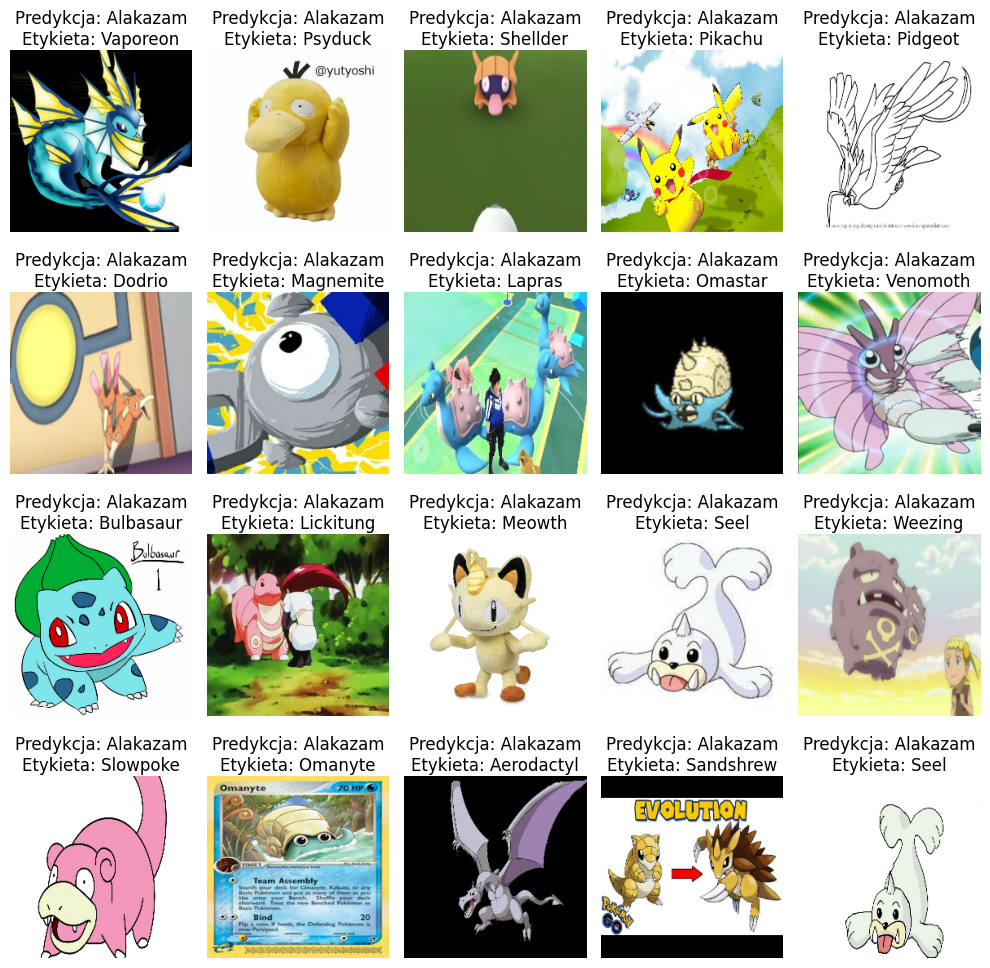

In [45]:
image_batch, label_batch = train_ds.as_numpy_iterator().next()
image_batch = image_batch[:20]
label_batch = label_batch[:20]

predictions3 = model3.predict_on_batch(image_batch).flatten()
predictions3 = tf.nn.sigmoid(predictions3)
predictions3 = tf.where(predictions3 < 0.5, 0, 1)

plt.figure(figsize=(10, 10))
for i in range(20):
    ax = plt.subplot(4, 5, i+1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(f"Predykcja: {class_names[predictions3[i]]}\nEtykieta: {class_names[label_batch[i]]}", wrap=True)
    plt.axis("off")
plt.tight_layout()  # Dopasuj odstępy między obrazami
plt.show()